In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
plt.rcParams.update({'font.size': 22})
plt.style.use('seaborn-colorblind')

### Importing Datasets

In [3]:
df_indexData = pd.read_csv("indexData.csv")
df_indexData.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
df_indexInfo = pd.read_csv("indexInfo.csv")

In [5]:
df_indexInfo

,Region,Exchange,Index,Currency
0,United States,New York Stock Exchange,NYA,USD
1,United States,NASDAQ,IXIC,USD
2,Hong Kong,Hong Kong Stock Exchange,HSI,HKD
3,China,Shanghai Stock Exchange,000001.SS,CNY
4,Japan,Tokyo Stock Exchange,N225,JPY
5,Europe,Euronext,N100,EUR
6,China,Shenzhen Stock Exchange,399001.SZ,CNY
7,Canada,Toronto Stock Exchange,GSPTSE,CAD
8,India,National Stock Exchange of India,NSEI,INR
9,Germany,Frankfurt Stock Exchange,GDAXI,EUR


In [6]:
df_indexProcessed = pd.read_csv("indexProcessed.csv")
df_indexProcessed.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume,CloseUSD
0,HSI,1986-12-31,2568.300049,2568.300049,2568.300049,2568.300049,2568.300049,0.0,333.879006
1,HSI,1987-01-02,2540.100098,2540.100098,2540.100098,2540.100098,2540.100098,0.0,330.213013
2,HSI,1987-01-05,2552.399902,2552.399902,2552.399902,2552.399902,2552.399902,0.0,331.811987
3,HSI,1987-01-06,2583.899902,2583.899902,2583.899902,2583.899902,2583.899902,0.0,335.906987
4,HSI,1987-01-07,2607.100098,2607.100098,2607.100098,2607.100098,2607.100098,0.0,338.923013


In [7]:
df_indexData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110253 non-null  float64
 4   Low        110253 non-null  float64
 5   Close      110253 non-null  float64
 6   Adj Close  110253 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [8]:
df_indexData.shape, df_indexInfo.shape, df_indexProcessed.shape

((112457, 8), (14, 4), (104224, 9))

### Pre-processing and Data Cleaning

In [9]:
df_indexData.isnull().sum()

Index           0
Date            0
Open         2204
High         2204
Low          2204
Close        2204
Adj Close    2204
Volume       2204
dtype: int64

In [10]:
df_indexData.dropna(inplace= True)
df_indexData.reset_index(drop= True, inplace= True)

In [11]:
df_indexData

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
110248,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
110249,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
110250,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
110251,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


In [12]:
#Date to pandas datetime
df_indexData['Date'] = pd.to_datetime(df_indexData['Date'])

In [13]:
df_indexData.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [14]:
df_indexData.columns

Index(['Index', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

* ‘High’ :- Highest price during the day.
* ‘Low’ :- Lowest price during the day.
* ‘Open’ :- Opening price of the day.
* ‘Close’ :- Closing price of the day.
* ‘Volume’ :- Total number of shares of stock traded during the day.
* ‘Adj Close’ :- The closing price is amended to account for any corporate actions to give the ‘Adjusted closing’ price.

In [15]:
df_indexData.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [16]:
idx = df_indexData.groupby(df_indexData['Index'])
NYA = idx.get_group("NYA")

In [17]:
NYA

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13942,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13943,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13944,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13945,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


## Exploratory Data Analysis

In [18]:
df_indexData.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110253.000000,110253.000000,110253.000000,110253.000000,1.102530e+05
mean,7658.515222,7704.372961,7608.000422,7657.545872,7657.351729,1.273975e+09
std,9011.478913,9066.638548,8954.506981,9011.510444,9011.608900,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.030029,1864.510010,1843.979980,1855.060059,1854.179565,0.000000e+00
50%,5194.089844,5226.279785,5154.049805,5194.750000,5194.750000,4.329000e+05
75%,10134.299810,10207.820310,10060.349610,10134.830080,10134.830080,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [19]:
grouped = df_indexData.groupby('Index')
grouped.describe()

Open                                                         \
             count          mean          std           min           25%   
Index                                                                       
000001.SS   5791.0   2381.208888   913.958767   1007.901001   1589.181457   
399001.SZ   5760.0   7968.340421  3958.723522   2533.270020   3928.867493   
GDAXI       8438.0   5915.549220  3649.999809    936.000000   2513.420044   
GSPTSE     10526.0   8091.106543  4931.159098   1352.000000   3455.100098   
HSI         8492.0  15206.355607  8134.381116   1950.500000   9261.092286   
IXIC       12690.0   1985.026961  2491.688809     54.869999    249.160004   
J203.JO     2346.0  50896.729912  7604.522487  32887.449220  47863.324220   
KS11        6029.0   1489.814704   668.486153    283.410004    811.539978   
N100        5474.0    822.261348   181.258352    427.600006    664.022522   
N225       13874.0  12852.286239  8028.559838   1020.489990   6080.977417   
NSEI        3346.0   7665.751273  2838.223515   2553.600098   5328.274902   
NYA        13947.0   4451.778151  4074.953735    347.769989    654.940002   
SSMI        7671.0   6410.012762  2441.470852   1288.699951   5087.549805   
TWII        5869.0   8037.662438  2217.813457   3475.870117   6438.490234   

                                                        High                \
                    50%           75%           max    count          mean   
Index                                                                        
000001.SS   2266.075928   3023.590942   6057.428223   5791.0   2402.121747   
399001.SZ   8372.740234  10782.342770  19554.580080   5760.0   8052.905487   
GDAXI       5404.735108   7916.622436  15548.290040   8438.0   5956.941632   
GSPTSE      7102.400147  12638.600103  19905.800780  10526.0   8128.025943   
HSI        14198.504885  22494.959957  33335.480470   8492.0  15303.626762   
IXIC        1091.214966   2551.347412  14204.509770  12690.0   1998.050288   
J203.JO    52172.316405  55936.558597  68775.062500   2346.0  51220.236232   
KS11        1663.660034   2009.640015   3239.919922   6029.0   1499.141995   
N100         828.899994    983.870025   1258.489990   5474.0    826.810234   
N225       11802.810055  18559.502932  38921.648440  13874.0  12919.694377   
NSEI        7485.625000  10071.537110  15437.750000   3346.0   7712.532773   
NYA         2631.800049   7339.489990  16590.429690  13947.0   4468.236552   
SSMI        6647.520020   8280.505371  11345.400390   7671.0   6448.342905   
TWII        7935.790039   9183.559570  17646.929690   5869.0   8082.502931   

           ...     Adj Close                 Volume                \
           ...           75%           max    count          mean   
Index      ...                                                      
000001.SS  ...   3023.578003   6092.057129   5791.0  1.065404e+05   
399001.SZ  ...  10792.239500  19530.931640   5760.0  2.500271e+05   
GDAXI      ...   7920.977417  15519.980470   8438.0  6.830384e+07   
GSPTSE     ...  12644.675293  19852.199220  10526.0  9.620499e+09   
HSI        ...  22464.002443  33154.121090   8492.0  8.430191e+08   
IXIC       ...   2549.307434  14138.780270  12690.0  9.915283e+08   
J203.JO    ...  55942.828130  68775.062500   2346.0  0.000000e+00   
KS11       ...   2009.520020   3249.300049   6029.0  4.190849e+05   
N100       ...    984.492493   1263.619995   5474.0  1.958226e+08   
N225       ...  18550.470217  38915.871090  13874.0  3.976289e+07   
NSEI       ...  10074.424805  15582.799810   3346.0  1.830719e+05   
NYA        ...   7337.935059  16590.429690  13947.0  1.215565e+09   
SSMI       ...   8280.225097  11426.150390   7671.0  3.646631e+07   
TWII       ...   9160.653320  17595.900390   5869.0  2.457311e+06   

                                                                         \
                    std     min         25%           50%           75%   
Index                                                

In [20]:
exchange_list = df_indexData['Index'].unique()
exchange_list

array(['NYA', 'IXIC', 'HSI', '000001.SS', 'GSPTSE', '399001.SZ', 'NSEI',
       'GDAXI', 'KS11', 'SSMI', 'TWII', 'J203.JO', 'N225', 'N100'],
      dtype=object)

### Analysing the closing prices for various stock exchanges

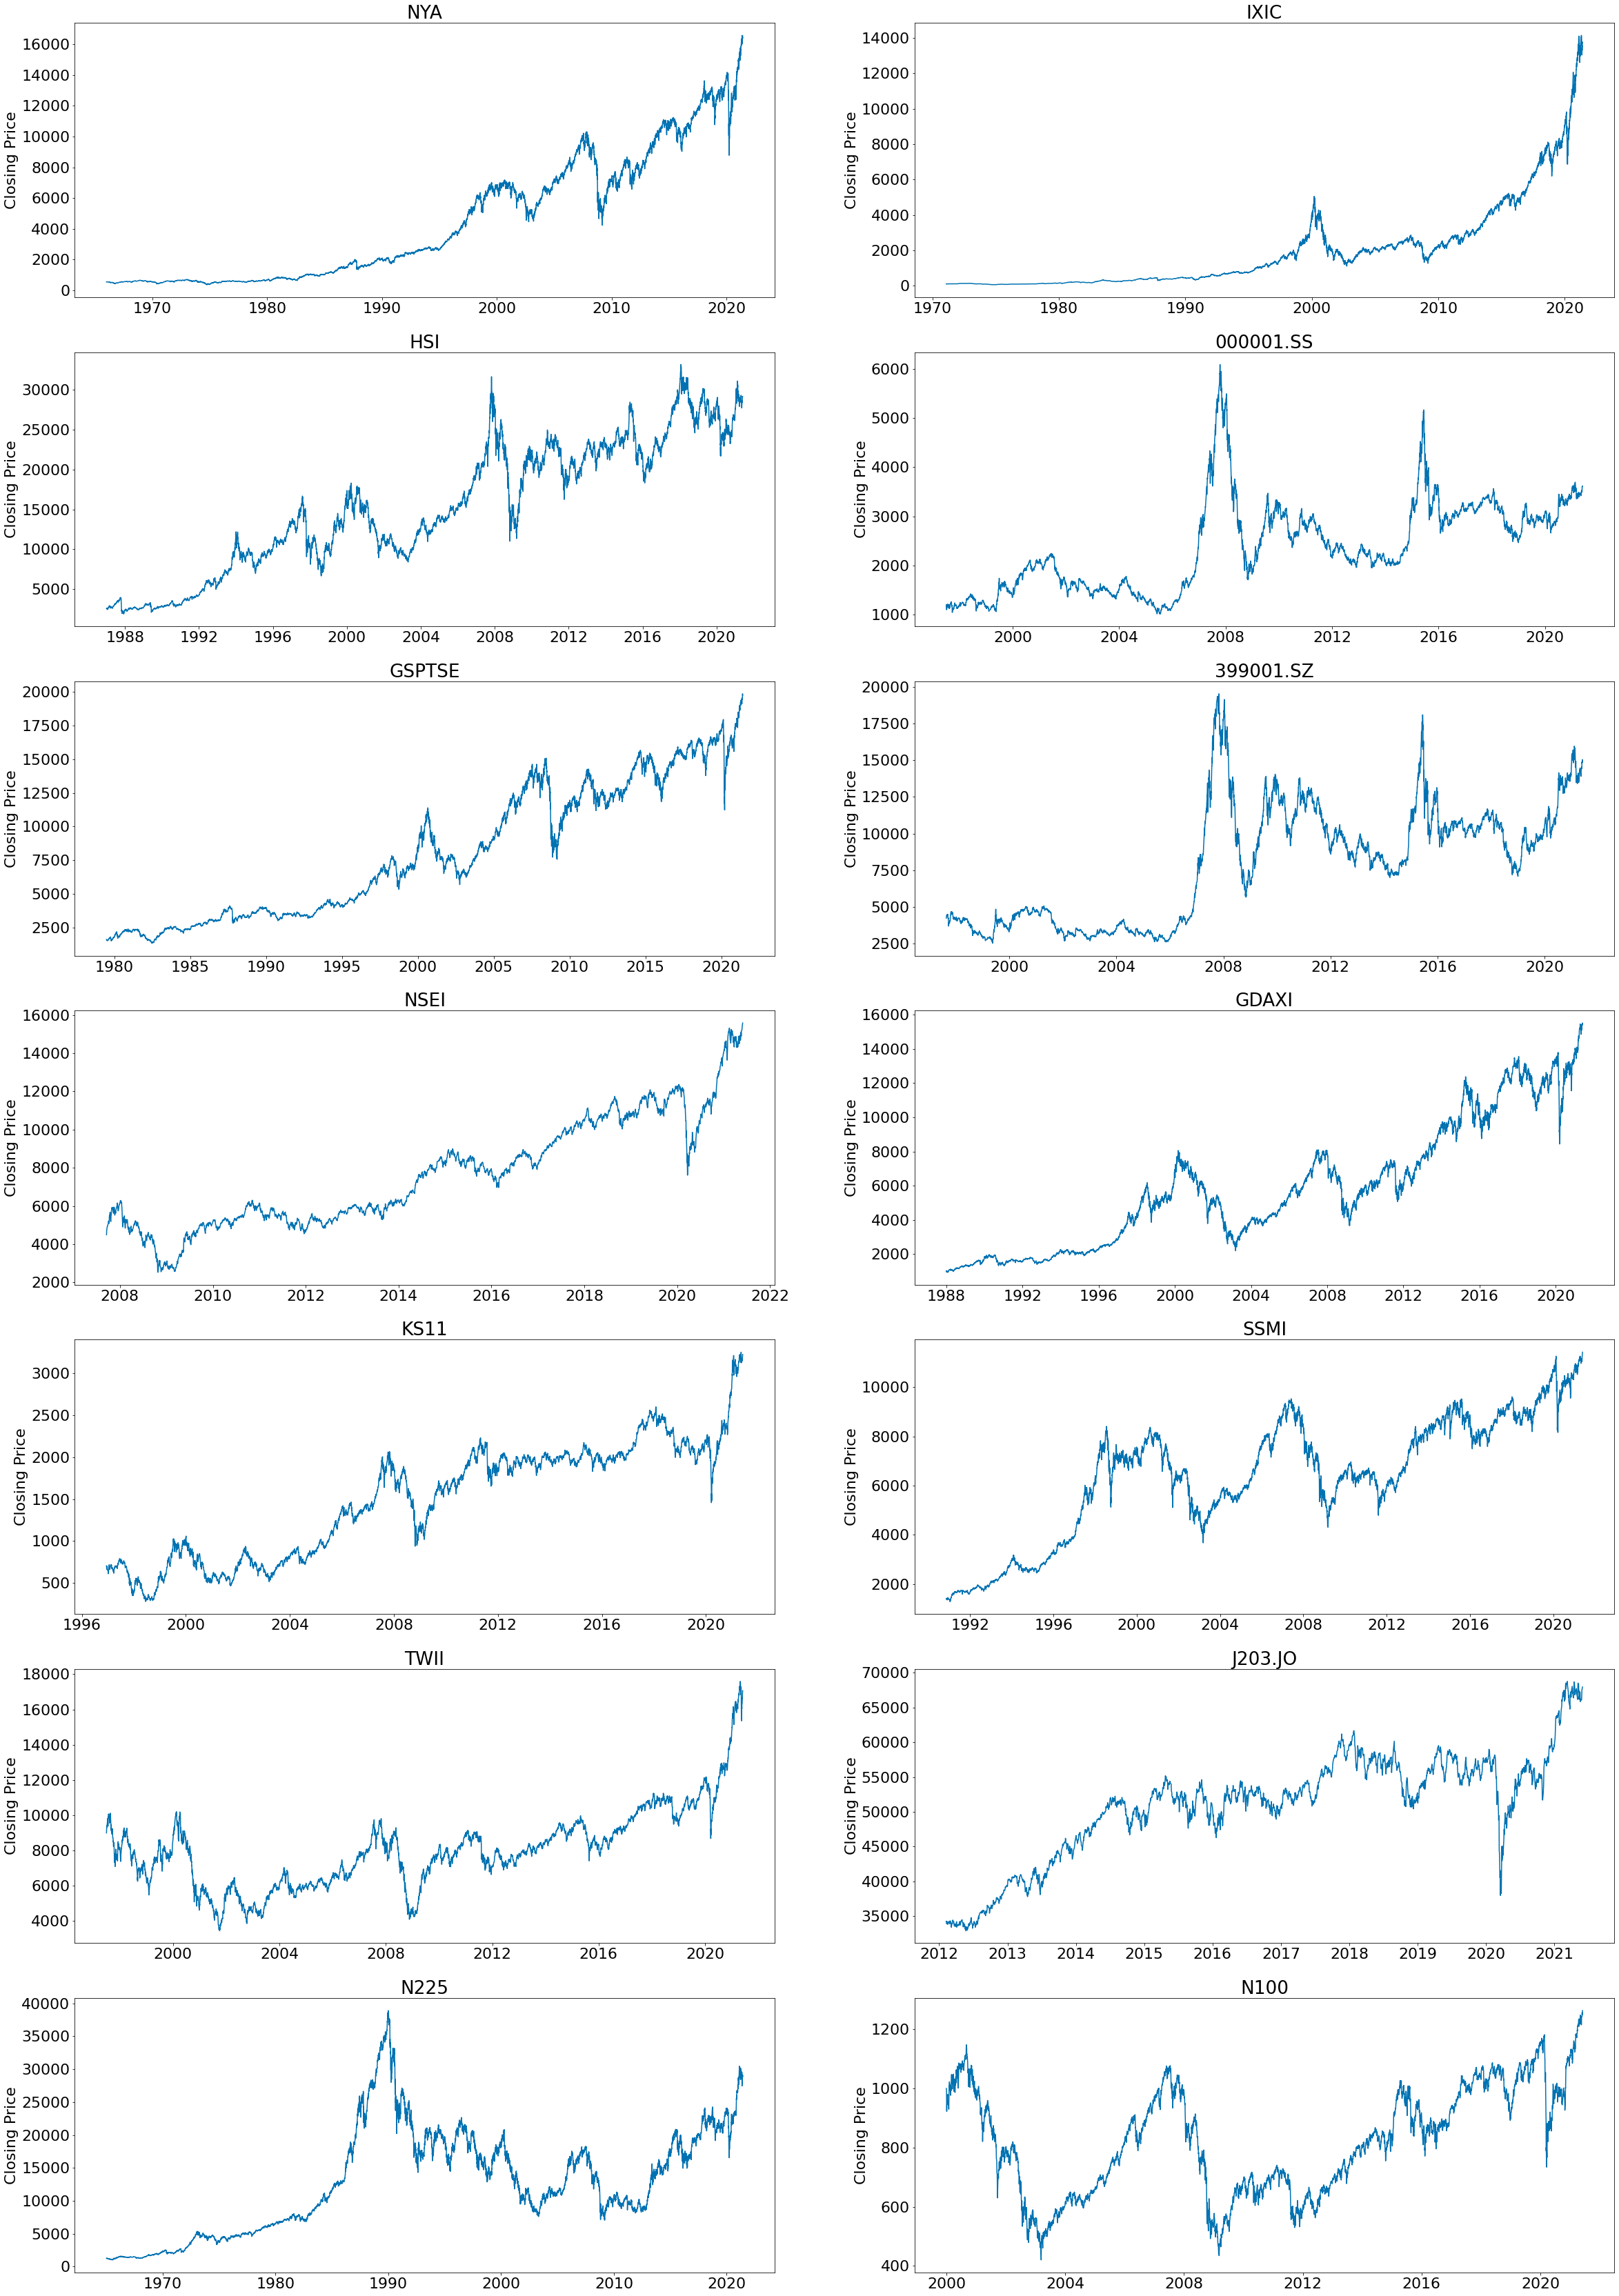

In [21]:
plt.figure(figsize=(40,60))
for i, exchange in enumerate(exchange_list, 1):
    plt.subplot(7,2,i)
    df = df_indexData[df_indexData['Index'] == exchange]
    plt.plot(df['Date'],df['Close'])
    plt.title(exchange)
    plt.ylabel('Closing Price')

### Analysing the total volume of stocks being traded

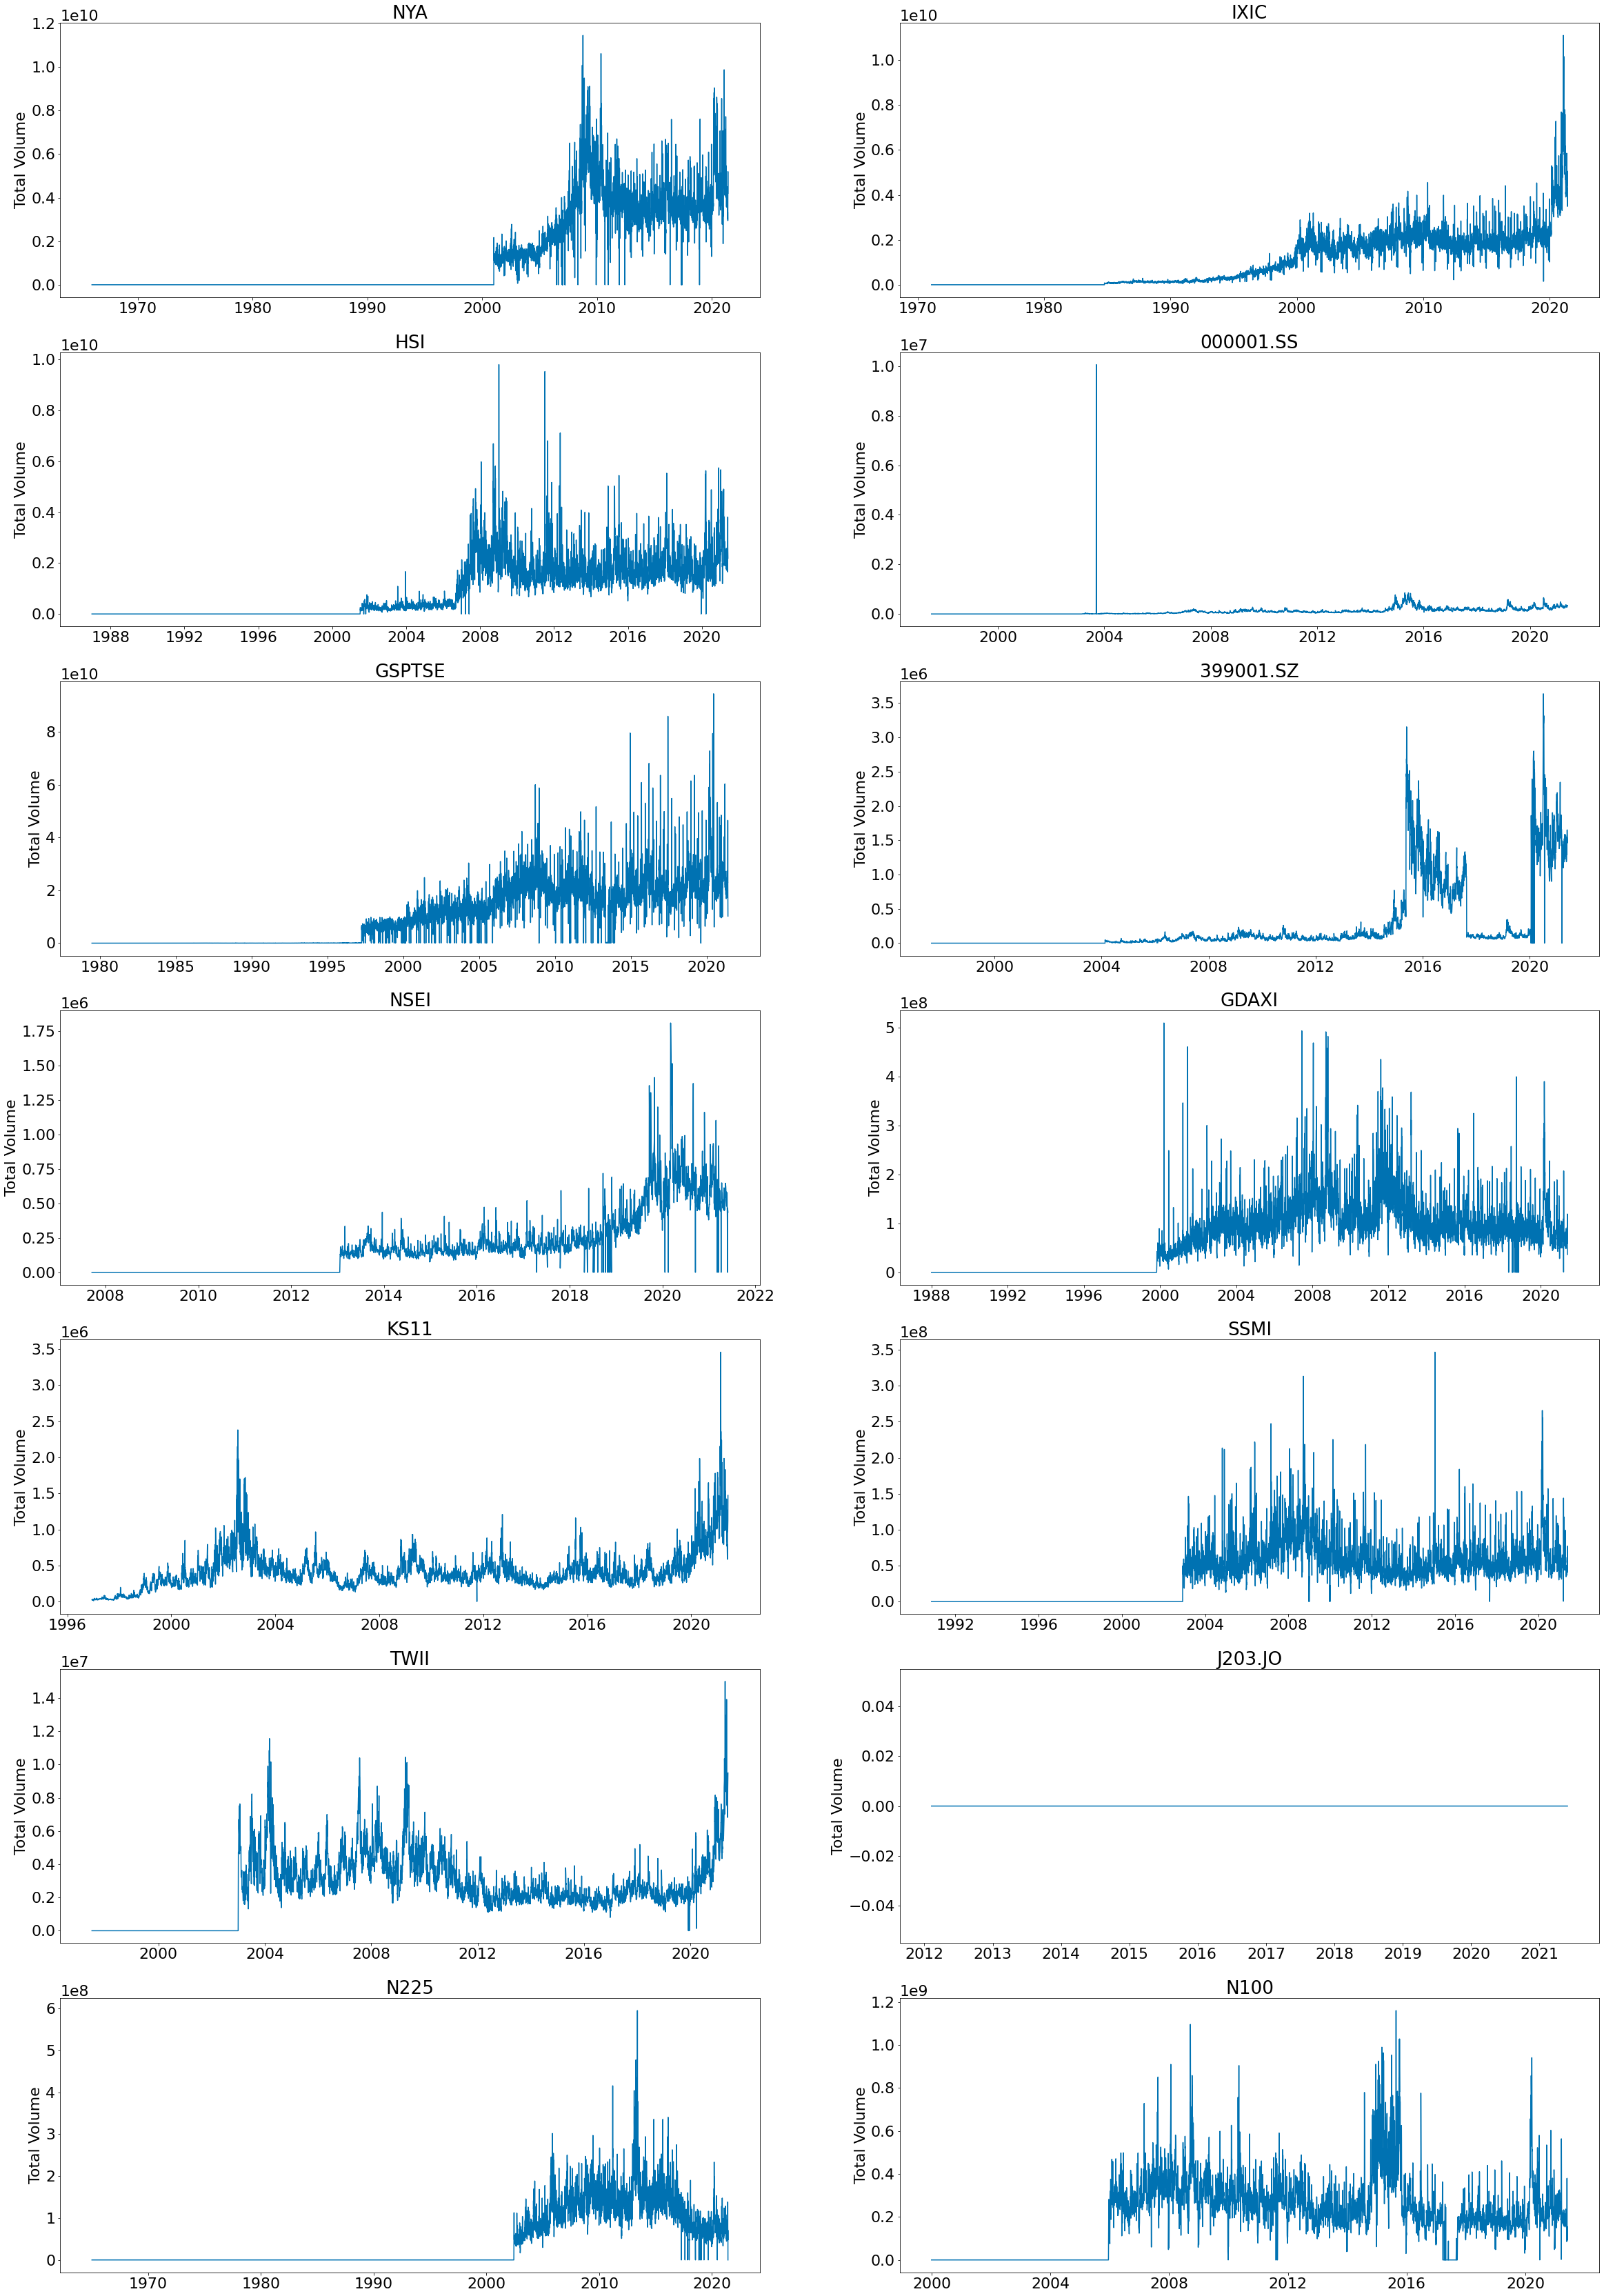

In [22]:
plt.figure(figsize=(40,60))
for i, exchange in enumerate(exchange_list, 1):
    plt.subplot(7,2,i)
    df = df_indexData[df_indexData['Index'] == exchange]
    plt.plot(df['Date'],df['Volume'])
    plt.title(exchange)
    plt.ylabel('Total Volume')

### Analysing the price changes for different exchanges

In [23]:
df_indexData['Price Change'] = df_indexData['Close']-df_indexData['Open']
df_indexData

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,0.000000
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,0.000000
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.000000
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.000000
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
110248,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0,5.949951
110249,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0,7.130005
110250,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0,-7.149902
110251,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0,3.969971


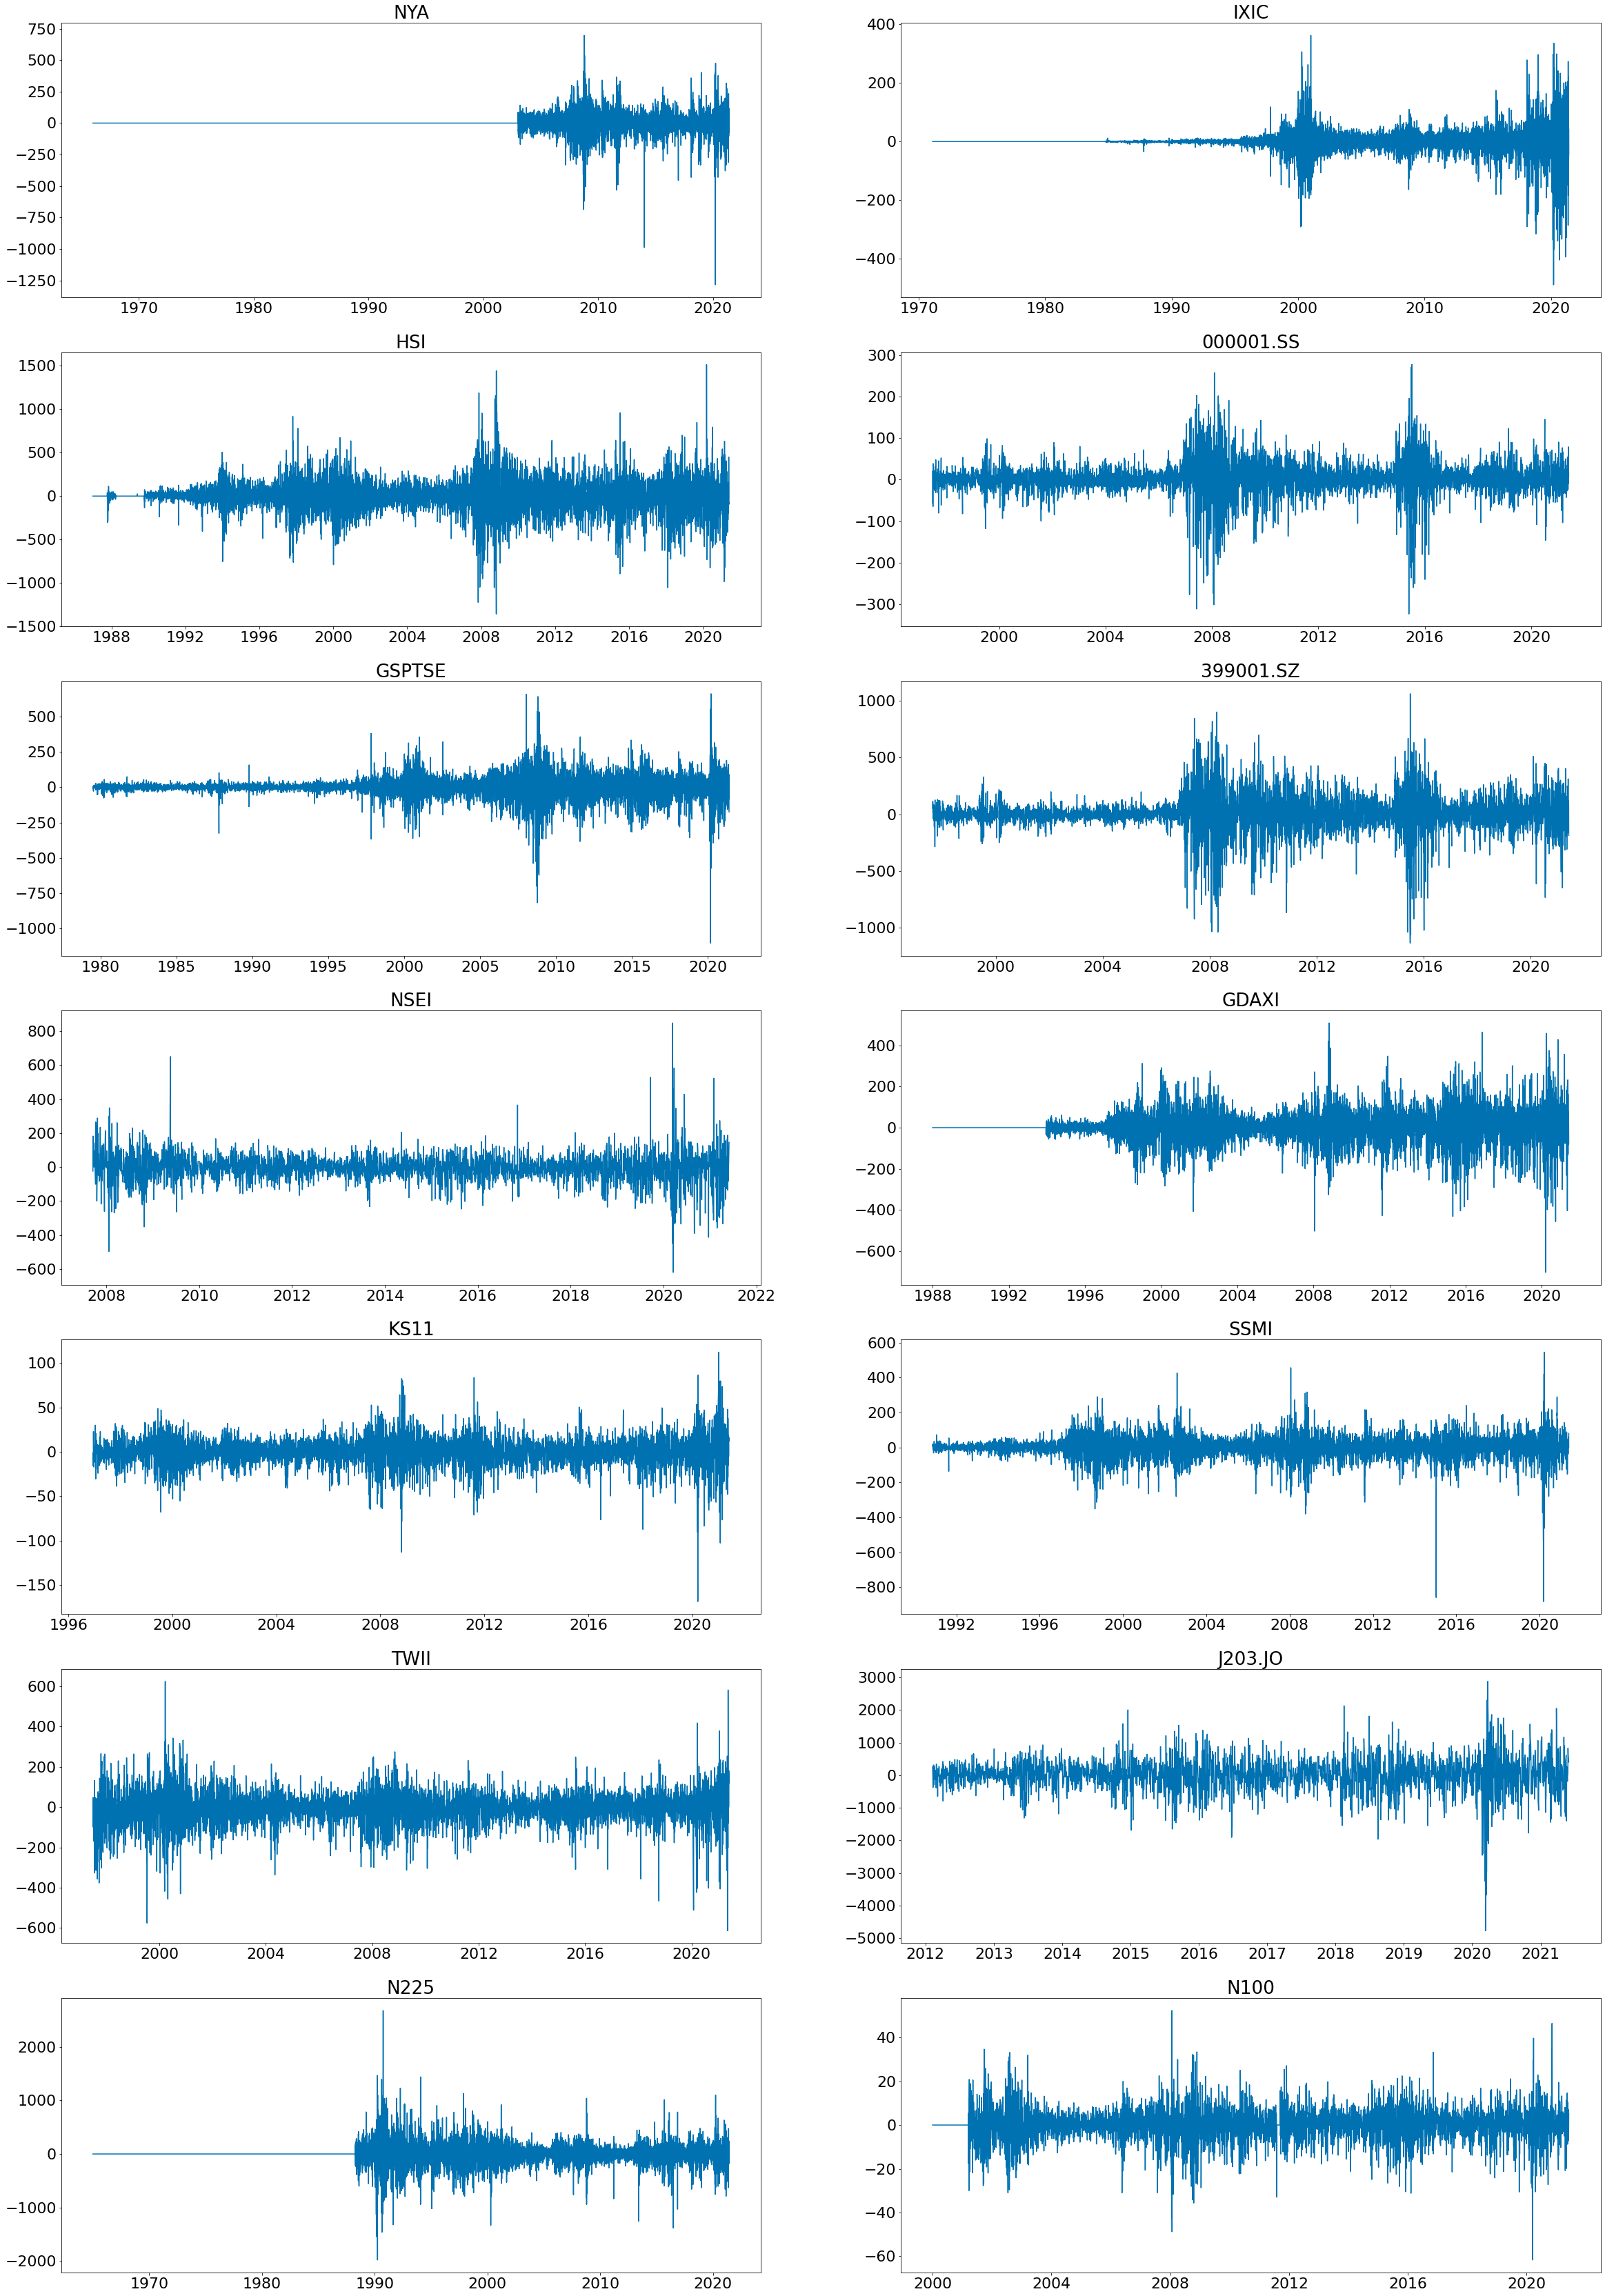

In [24]:
plt.figure(figsize=(40,60))
for i, exchange in enumerate(exchange_list, 1):
    plt.subplot(7,2,i)
    df = df_indexData[df_indexData['Index'] == exchange]
    plt.plot(df['Date'],df['Price Change'])
    plt.title(exchange)

### Viewing the distribution of stocks for each exchange

<AxesSubplot:xlabel='Index', ylabel='count'>

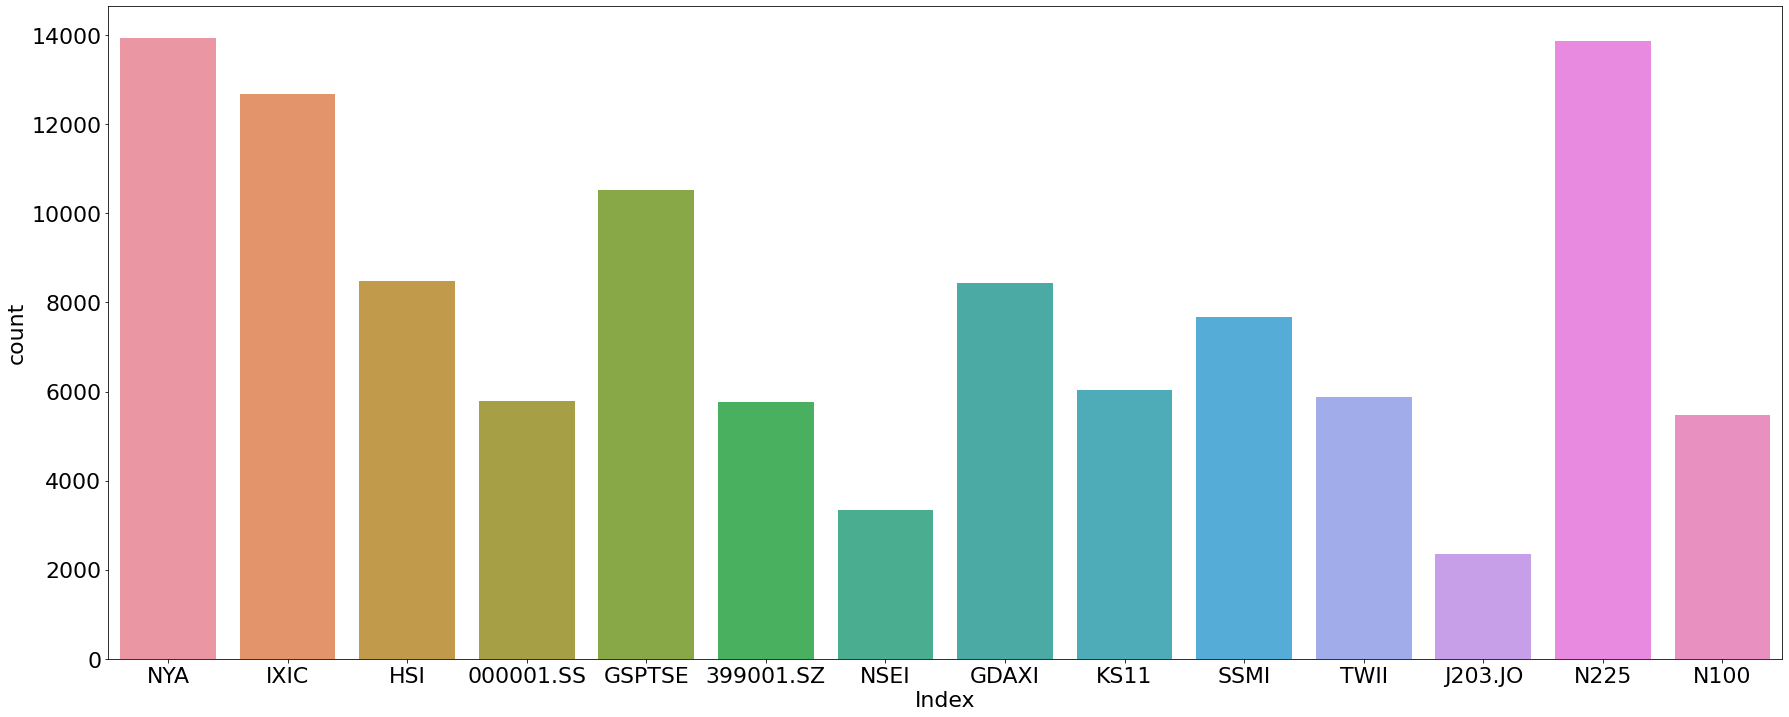

In [25]:
plt.figure(figsize=(30,12))
sns.countplot(data=df_indexData, x='Index')

## Multiple Linear Regression

#### Creating dataframes for independent and dependent variables

In [26]:
idp_df = df_indexData.drop(['Close','Adj Close','Price Change','Date'], axis=1)
idp_df.head()

,Index,Open,High,Low,Volume
0,NYA,528.690002,528.690002,528.690002,0.0
1,NYA,527.210022,527.210022,527.210022,0.0
2,NYA,527.840027,527.840027,527.840027,0.0
3,NYA,531.119995,531.119995,531.119995,0.0
4,NYA,532.070007,532.070007,532.070007,0.0


In [27]:
dp_df = df_indexData[['Close']]
dp_df.head()

,Close
0,528.690002
1,527.210022
2,527.840027
3,531.119995
4,532.070007


<AxesSubplot:>

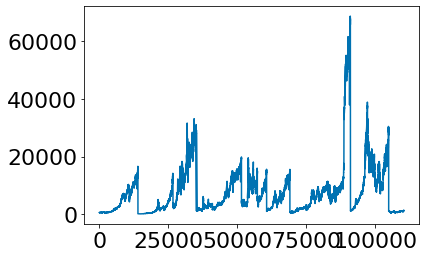

In [28]:
df_indexData['Close'].plot(kind='line')

Converting the Categorical variable Index to dummy values for the multiple linear regression

In [29]:
idp_df = pd.get_dummies(idp_df, columns=['Index'])

In [30]:
idp_df.head()

,Open,High,Low,Volume,Index_000001.SS,Index_399001.SZ,Index_GDAXI,Index_GSPTSE,Index_HSI,Index_IXIC,Index_J203.JO,Index_KS11,Index_N100,Index_N225,Index_NSEI,Index_NYA,Index_SSMI,Index_TWII
0,528.690002,528.690002,528.690002,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,527.210022,527.210022,527.210022,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,527.840027,527.840027,527.840027,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,531.119995,531.119995,531.119995,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,532.070007,532.070007,532.070007,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Splitting the Data

In [31]:
from sklearn.model_selection import train_test_split

#Splitting the data with test size as 0.25
X_train, X_test, y_train, y_test = train_test_split(idp_df, dp_df, test_size = 0.25, random_state = 42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82689, 18), (27564, 18), (82689, 1), (27564, 1))

### Performing the multiple linear regression model

In [33]:
# Importing the module
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression Class
MLR = LinearRegression()

#Fitting the train set
MLR.fit(X_train, y_train)

LinearRegression()

In [34]:
# Permutation feature importance
import rfpimp
imp = rfpimp.importances(MLR, X_test, y_test)

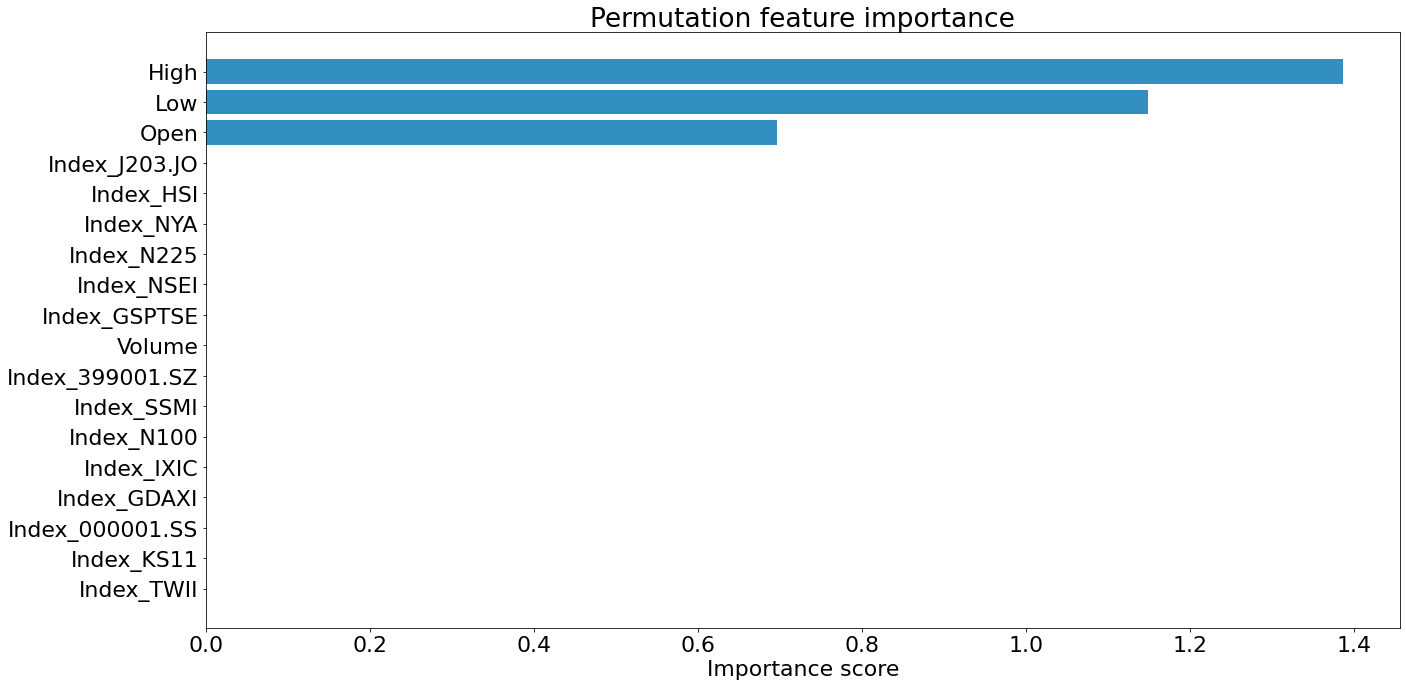

In [35]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.barh(imp.index, imp['Importance'], height=0.8, alpha=0.8)
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
plt.gca().invert_yaxis()

fig.tight_layout()

In [36]:
y_prediction = MLR.predict(X_test)
y_prediction

array([[  831.18168782],
       [12939.94121406],
       [ 2664.92292007],
       ...,
       [19666.21785585],
       [ 2745.70328784],
       [13172.47066484]])

#### Measuring the performance of the Multiple Linear Regression Model

In [37]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

#Computing the accuracy of the model
r2  = r2_score(y_test, y_prediction)
MSE = mean_squared_error(y_test, y_prediction)
RMSE = np.sqrt(MSE)

print('The r2 score for the MLR model is: ', round(r2,5))
print('The Mean Squared Error for the MLR model is: ', round(MSE,5))
print('The Root Mean Squared Error for the MLR model is: ', round(RMSE,5))

The r2 score for the MLR model is:  0.99997
The Mean Squared Error for the MLR model is:  2336.91495
The Root Mean Squared Error for the MLR model is:  48.34165


## Polynomial Regression

In [38]:
X = NYA['High'].values
y = NYA['Close'].values
X = X.reshape(-1,1)

In [39]:
#Displaying the High values and Close values
X,y

(array([[  528.690002],
        [  527.210022],
        [  527.840027],
        ...,
        [16466.33984 ],
        [16546.35938 ],
        [16588.68945 ]]),
 array([  528.690002,   527.210022,   527.840027, ..., 16451.96094 ,
        16531.94922 , 16555.66016 ]))

In [40]:
# Training the Linear Regression model on the X and y values
LR = LinearRegression()
LR.fit(X,y)

LinearRegression()

In [41]:
#Training the Polynomial Regression model on the data
from sklearn.preprocessing import PolynomialFeatures
PolyReg = PolynomialFeatures(degree= 3)
X_poly = PolyReg.fit_transform(X)
LR2 = LinearRegression()
LR2.fit(X_poly, y)

LinearRegression()

Text(0, 0.5, 'Close')

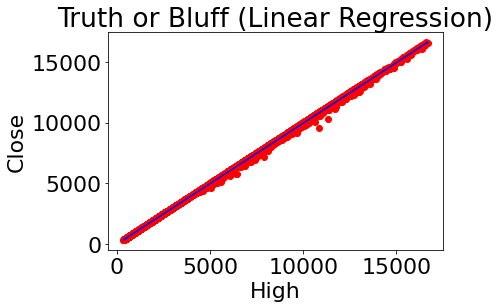

In [42]:
# Visualizing the Linear Regression Results
plt.scatter(X, y, color = 'red')
plt.plot(X, LR.predict(X), color='blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('High')
plt.ylabel('Close')

Text(0, 0.5, 'Close')

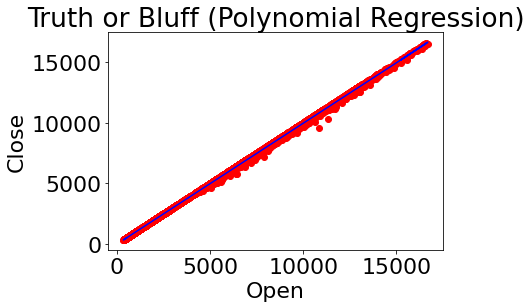

In [43]:
# Visualizing the Polynomial Regression results
plt.scatter(X, y , color ='red')
plt.plot(X, LR2.predict(PolyReg.fit_transform(X)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Open')
plt.ylabel('Close')

In [44]:
LR.predict([[16546.35938]])

array([16471.56153619])

In [45]:
LR2.predict(PolyReg.fit_transform([[16546.35938]]))

array([16499.76408247])

## Lasso Regression

In [46]:
X_numerical = df_indexData.drop(['Index','Date','Adj Close','Price Change','Close'], axis=1).astype('float')

In [47]:
list_numerical = X_numerical.columns
list_numerical

Index(['Open', 'High', 'Low', 'Volume'], dtype='object')

In [48]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(idp_df, dp_df, test_size= 0.25, random_state=42)

In [49]:
X_train.head()

,Open,High,Low,Volume,Index_000001.SS,Index_399001.SZ,Index_GDAXI,Index_GSPTSE,Index_HSI,Index_IXIC,Index_J203.JO,Index_KS11,Index_N100,Index_N225,Index_NSEI,Index_NYA,Index_SSMI,Index_TWII
92143,2312.000000,2312.000000,2312.000000,0.000000e+00,0,0,0,0,0,0,0,0,0,1,0,0,0,0
35395,1315.135010,1315.469971,1299.927002,0.000000e+00,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10693,8865.099609,8865.099609,8640.740234,5.231280e+09,0,0,0,0,0,0,0,0,0,0,0,1,0,0
60691,1156.250000,1156.250000,1156.250000,0.000000e+00,0,0,1,0,0,0,0,0,0,0,0,0,0,0
38642,2221.832031,2288.627930,2218.274902,1.096000e+05,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Standardization

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])

X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [51]:
X_train

,Open,High,Low,Volume,Index_000001.SS,Index_399001.SZ,Index_GDAXI,Index_GSPTSE,Index_HSI,Index_IXIC,Index_J203.JO,Index_KS11,Index_N100,Index_N225,Index_NSEI,Index_NYA,Index_SSMI,Index_TWII
92143,-0.592847,-0.594257,-0.590974,-0.295526,0,0,0,0,0,0,0,0,0,1,0,0,0,0
35395,-0.703454,-0.704148,-0.703980,-0.295526,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10693,0.134257,0.128374,0.115680,0.920775,0,0,0,0,0,0,0,0,0,0,0,1,0,0
60691,-0.721083,-0.721706,-0.720023,-0.295526,0,0,1,0,0,0,0,0,0,0,0,0,0,0
38642,-0.602851,-0.596835,-0.601439,-0.295500,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54886,0.316626,0.316101,0.319303,-0.295509,0,1,0,0,0,0,0,0,0,0,0,0,0,0
76820,-0.164613,-0.160608,-0.163011,-0.295526,0,0,0,0,0,0,0,0,0,0,0,0,1,0
103694,1.302543,1.293673,1.315468,-0.275646,0,0,0,0,0,0,0,0,0,1,0,0,0,0
860,-0.787934,-0.788145,-0.787297,-0.295526,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
#Performing the Lasso Regression

from sklearn.linear_model import Lasso

LassoR = Lasso(alpha=1)
LassoR.fit(X_train, y_train)

Lasso(alpha=1)

In [53]:
LassoPred = LassoR.predict(X_test)
LassoPred

array([  833.89256822, 12700.19447639,  2662.7660243 , ...,
       19562.92734081,  2743.5234186 , 13203.89081735])

#### Lasso Regression Model Evaluation

In [54]:
r2  = r2_score(y_test, LassoPred)
MSE = mean_squared_error(y_test, LassoPred)
RMSE = np.sqrt(MSE)

print('The R-squared score for the Lasso Regression model is: ', round(r2,4))
print('The Mean Squared Error for the Lasso Regression model is: ', round(MSE,3))
print('The Root Mean Squared Error for the Lasso Regression model is: ', round(RMSE,3))

The R-squared score for the Lasso Regression model is:  0.9998
The Mean Squared Error for the Lasso Regression model is:  12941.173
The Root Mean Squared Error for the Lasso Regression model is:  113.759


### Lasso with suitable alpha value

In [55]:
from sklearn.linear_model import LassoCV

#Performing Lasso with 5 fold cross validation
LasModel = LassoCV(cv=5, random_state=0, max_iter=10000)

#Fitting the model
LasModel.fit(X_train, y_train)

/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(cv=5, max_iter=10000, random_state=0)

In [56]:
LasModel.alpha_

9.012971914364018

In [57]:
#Performing the best model of Lasso Regression
best_lasso = Lasso(alpha = LasModel.alpha_)
best_lasso.fit(X_train, y_train)

Lasso(alpha=9.012971914364018)

In [58]:
LassoPredBest = best_lasso.predict(X_test)

In [59]:
#Evaluating the best Lasso model
r2  = r2_score(y_test, LassoPredBest)
MSE = mean_squared_error(y_test, LassoPredBest)
RMSE = np.sqrt(MSE)

print('The R-squared score for the best Lasso Regression model is: ', round(r2,4))
print('The Mean Squared Error for the best Lasso Regression model is: ', round(MSE,3))
print('The Root Mean Squared Error for the best Lasso Regression model is: ', round(RMSE,3))

The R-squared score for the best Lasso Regression model is:  0.9998
The Mean Squared Error for the best Lasso Regression model is:  12965.992
The Root Mean Squared Error for the best Lasso Regression model is:  113.868


## Ridge Regression

Finding the optimal alpha value for the Ridge Regression

In [60]:
alphas = 10**np.linspace(10,-2,100)*0.5
alphas

array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+07, 1.07721735e+07, 8.14875417e+06,
       6.16423370e+06, 4.66301673e+06, 3.52740116e+06, 2.66834962e+06,
       2.01850863e+06, 1.52692775e+06, 1.15506485e+06, 8.73764200e+05,
       6.60970574e+05, 5.00000000e+05, 3.78231664e+05, 2.86118383e+05,
       2.16438064e+05, 1.63727458e+05, 1.23853818e+05, 9.36908711e+04,
       7.08737081e+04, 5.36133611e+04, 4.05565415e+04, 3.06795364e+04,
       2.32079442e+04, 1.75559587e+04, 1.32804389e+04, 1.00461650e+04,
       7.59955541e+03, 5.74878498e+03, 4.34874501e+03, 3.28966612e+03,
       2.48851178e+03, 1.88246790e+03, 1.42401793e+03, 1.07721735e+03,
      

In [61]:
from sklearn.linear_model import RidgeCV, Ridge

RidgeR = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize=True)
RidgeR.fit(X_train, y_train)
RidgeR.alpha_

/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered i

/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha ** -1)
/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:1791: RuntimeWarning: invalid value encountered in reciprocal
  w = ((singvals_sq + alpha) ** -1) - (alpha **

0.005

Since the optimal alpha is 0.005, I'll develop a Ridge Regression using this certain alpha value that we computed using cross validation

In [62]:
RidgeReg = Ridge(alpha= 0.005, normalize=True)
RidgeReg.fit(X_train, y_train)
RidgePred = RidgeReg.predict(X_test)

/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


In [63]:
#Evaluating the best Lasso model
r2  = r2_score(y_test, RidgePred)
MSE = mean_squared_error(y_test, RidgePred)
RMSE = np.sqrt(MSE)

print('The R-squared score for the Ridge Regression model is: ', round(r2,4))
print('The Mean Squared Error for the Ridge Regression model is: ', round(MSE,3))
print('The Root Mean Squared Error for the Ridge Regression model is: ', round(RMSE,3))

The R-squared score for the Ridge Regression model is:  0.9999
The Mean Squared Error for the Ridge Regression model is:  7263.458
The Root Mean Squared Error for the Ridge Regression model is:  85.226


## KMeans Clustering

In [64]:
filtered_df = df_indexData.loc[(df_indexData['Date'] >= '2008-01-01')]

In [65]:
filtered_df

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change
10571,NYA,2008-01-02,9740.309570,9781.570313,9612.019531,9647.500000,9647.500000,3.452650e+09,-92.809570
10572,NYA,2008-01-03,9647.509766,9712.830078,9639.709961,9656.000000,9656.000000,3.429500e+09,8.490234
10573,NYA,2008-01-04,9655.919922,9655.919922,9428.089844,9432.030273,9432.030273,4.166000e+09,-223.889649
10574,NYA,2008-01-07,9431.959961,9509.759766,9379.639648,9462.240234,9462.240234,4.221260e+09,30.280273
10575,NYA,2008-01-08,9462.679688,9576.379883,9317.910156,9326.080078,9326.080078,4.705390e+09,-136.599610
...,...,...,...,...,...,...,...,...,...
110248,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,3.796964e+08,5.949951
110249,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,1.607734e+08,7.130005
110250,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,9.117370e+07,-7.149902
110251,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,1.551799e+08,3.969971


In [66]:
filtered_df = filtered_df.drop(['Date','Price Change'], axis=1)
filtered_df

,Index,Open,High,Low,Close,Adj Close,Volume
10571,NYA,9740.309570,9781.570313,9612.019531,9647.500000,9647.500000,3.452650e+09
10572,NYA,9647.509766,9712.830078,9639.709961,9656.000000,9656.000000,3.429500e+09
10573,NYA,9655.919922,9655.919922,9428.089844,9432.030273,9432.030273,4.166000e+09
10574,NYA,9431.959961,9509.759766,9379.639648,9462.240234,9462.240234,4.221260e+09
10575,NYA,9462.679688,9576.379883,9317.910156,9326.080078,9326.080078,4.705390e+09
...,...,...,...,...,...,...,...
110248,N100,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,3.796964e+08
110249,N100,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,1.607734e+08
110250,N100,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,9.117370e+07
110251,N100,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,1.551799e+08


In [67]:
categorical_features_idx = [0]

In [68]:
mark_array = filtered_df.to_numpy()

In [69]:
from kmodes.kprototypes import KPrototypes

# Selecting the optimal K using Elbow method
cost = []
for cluster in range(1,10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(mark_array, categorical = categorical_features_idx)
        cost.append(kprototype.cost_)
        print('Cluster start: {}'.format(cluster))
    except:
        break

Cluster start: 1
Cluster start: 2
Cluster start: 3
Cluster start: 4
Cluster start: 5
Cluster start: 6
Cluster start: 7
Cluster start: 8
Cluster start: 9


In [70]:
df_cost = pd.DataFrame({'Cluster': range(1,10), 'Cost':cost})
df_cost

,Cluster,Cost
0,1,1.552454e+24
1,2,2.396652e+23
2,3,1.797067e+23
3,4,9.606026e+22
4,5,8.341388e+22
5,6,4.617310e+22
6,7,3.078428e+22
7,8,2.673805e+22
8,9,2.003401e+22


Text(0, 0.5, 'cost')

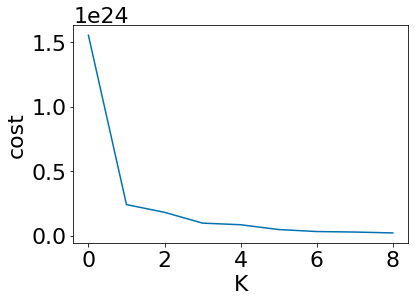

In [71]:
plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')

The elbow plot showcases that the optimal K value for the KMeans clsutering is 3.

In [72]:
#Fitting the cluster 
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init='Huang', random_state = 0)
kprototype.fit_predict(mark_array, categorical = categorical_features_idx)

array([1, 1, 1, ..., 2, 2, 2], dtype=uint16)

In [73]:
# Cluster centorid
kprototype.cluster_centroids_

array([['13978.572940112963', '14048.487324038653', '13893.543410930033',
        '13974.613853063714', '13974.613853063714', '21873974277.548428',
        'GSPTSE'],
       ['11331.531030814951', '11403.331356706289', '11247.10930156302',
        '11328.458611253607', '11328.458611253607', '3172939979.9247937',
        'NYA'],
       ['10985.400868730903', '11054.946886007125', '10910.897611118198',
        '10984.968130316116', '10984.957906237289', '133744001.08507466',
        'N100']], dtype='<U32')

In [74]:
# Check the iteration of the clusters created
kprototype.n_iter_

8

In [75]:
# Check the cost of the clusters created
kprototype.cost_

1.7970671084033857e+23

In [76]:
filtered_df['Cluster'] = kprototype.labels_

<AxesSubplot:xlabel='Index', ylabel='Close'>

<Figure size 2160x864 with 0 Axes>

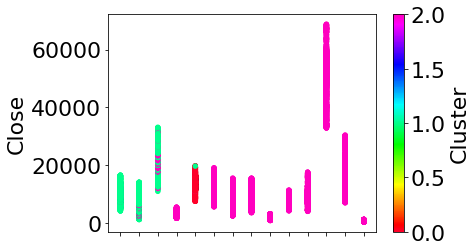

In [77]:
plt.figure(figsize=(30,12))
filtered_df.plot.scatter('Index','Close',c='Cluster', colormap='gist_rainbow')

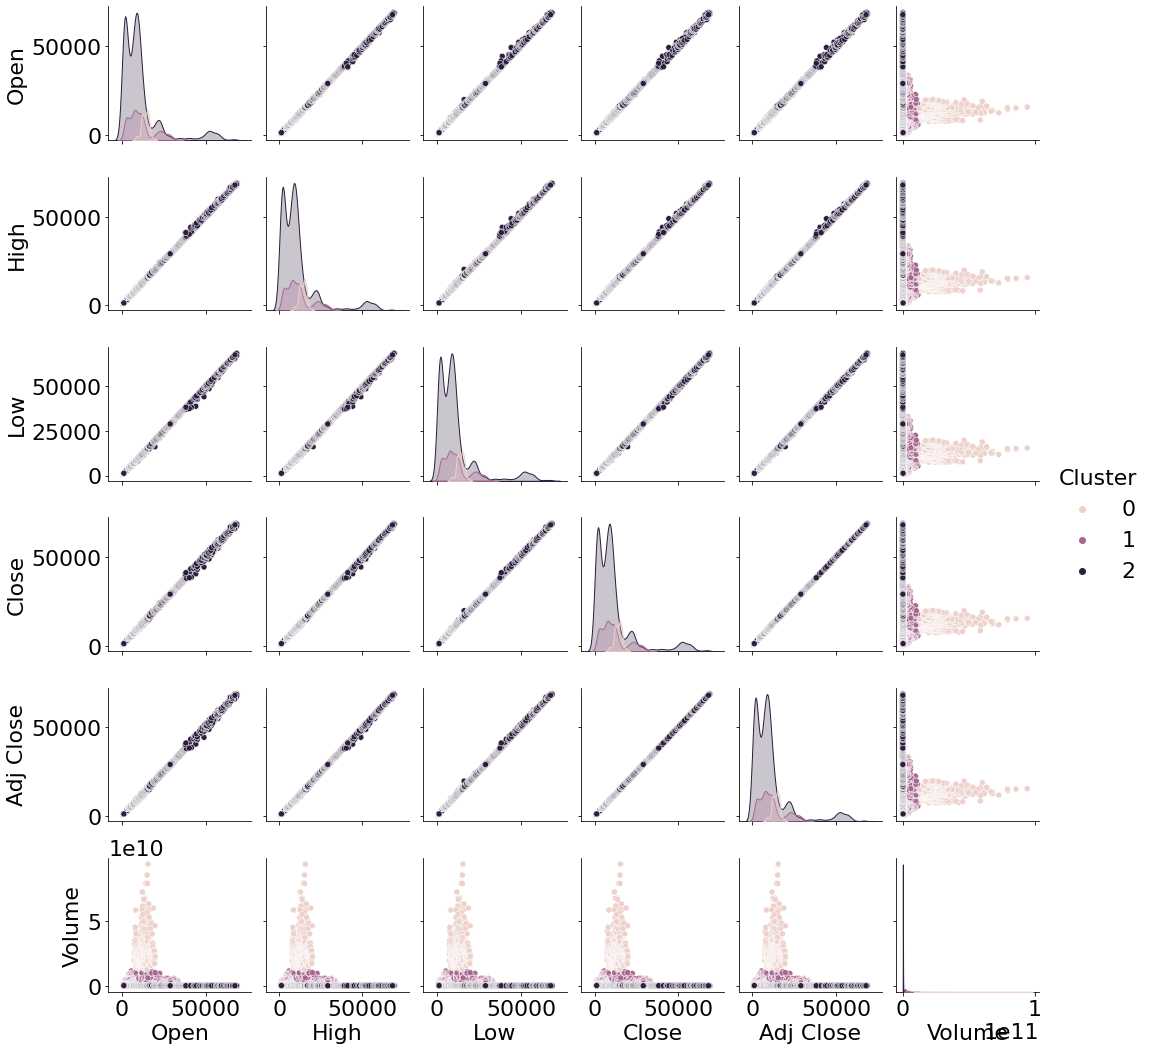

In [78]:
sns.pairplot(filtered_df, hue='Cluster')

#### Viewing the major clusters

<AxesSubplot:xlabel='Cluster', ylabel='count'>

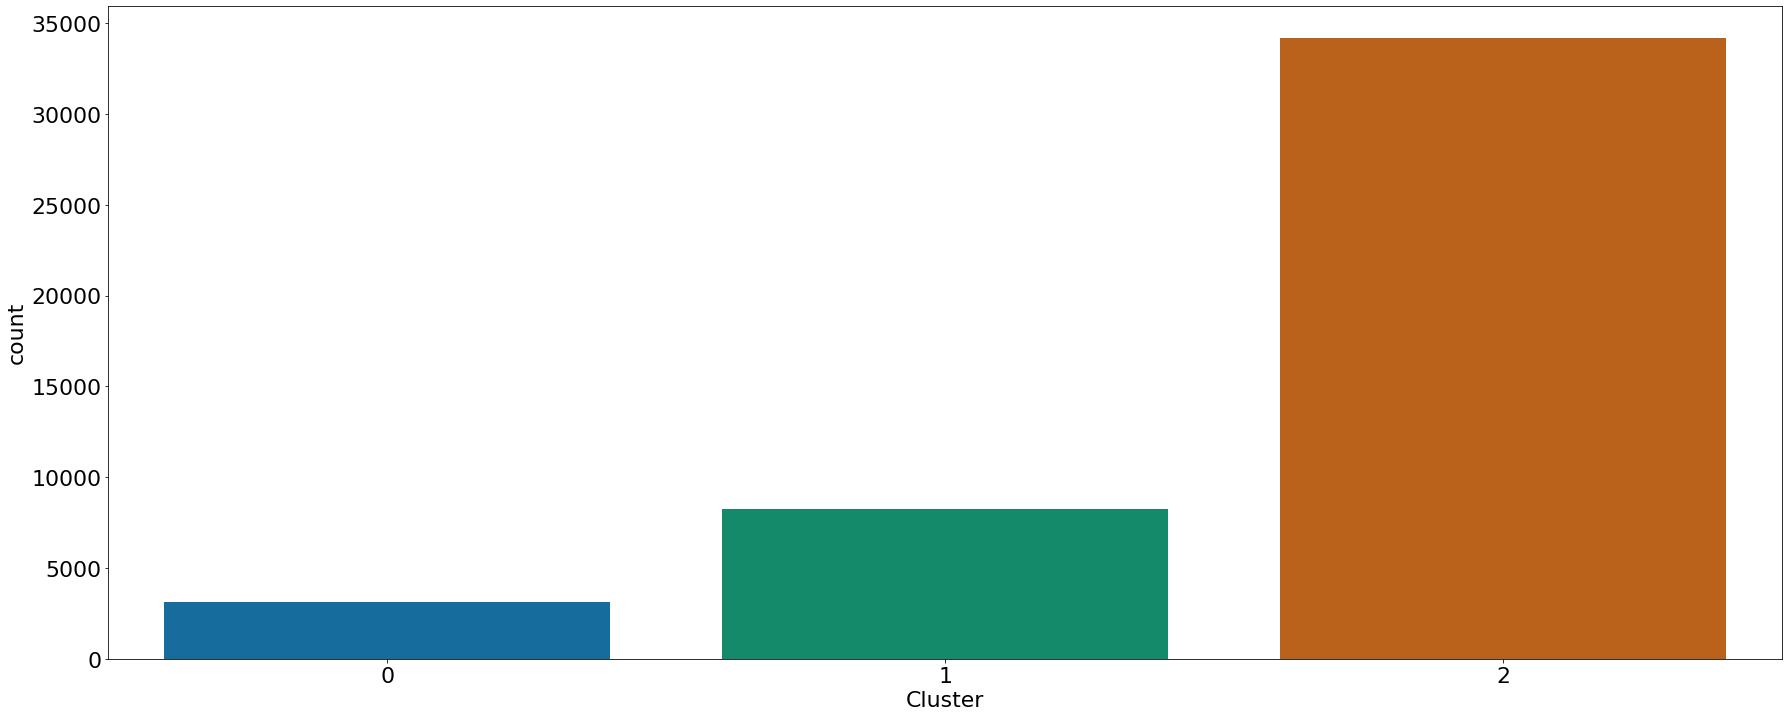

In [79]:
plt.figure(figsize=(30,12))
sns.countplot(data=filtered_df, x='Cluster')

In [80]:
filtered_df[filtered_df['Cluster'] == 0]

,Index,Open,High,Low,Close,Adj Close,Volume,Cluster
48080,GSPTSE,13907.70020,13945.40039,13833.09961,13926.79981,13926.79981,1.486837e+10,0
48081,GSPTSE,13906.79981,14037.70020,13877.29981,13978.20020,13978.20020,1.938937e+10,0
48082,GSPTSE,13875.00000,13978.20020,13769.09961,13778.59961,13778.59961,1.699096e+10,0
48083,GSPTSE,13781.90039,13839.70020,13569.70020,13618.90039,13618.90039,1.954063e+10,0
48084,GSPTSE,13749.00000,13771.20020,13521.79981,13541.79981,13541.79981,2.356760e+10,0
...,...,...,...,...,...,...,...,...
51440,GSPTSE,19614.80078,19614.80078,19507.80078,19527.30078,19527.30078,1.719575e+10,0
51441,GSPTSE,19621.30078,19679.90039,19553.80078,19564.09961,19564.09961,2.321558e+10,0
51442,GSPTSE,19654.19922,19763.69922,19634.59961,19745.50000,19745.50000,2.281863e+10,0
51443,GSPTSE,19768.09961,19835.30078,19752.50000,19774.40039,19774.40039,4.650791e+10,0


In [81]:
filtered_df[filtered_df['Cluster'] == 1]

,Index,Open,High,Low,Close,Adj Close,Volume,Cluster
10571,NYA,9740.309570,9781.570313,9612.019531,9647.500000,9647.500000,3.452650e+09,1
10572,NYA,9647.509766,9712.830078,9639.709961,9656.000000,9656.000000,3.429500e+09,1
10573,NYA,9655.919922,9655.919922,9428.089844,9432.030273,9432.030273,4.166000e+09,1
10574,NYA,9431.959961,9509.759766,9379.639648,9462.240234,9462.240234,4.221260e+09,1
10575,NYA,9462.679688,9576.379883,9317.910156,9326.080078,9326.080078,4.705390e+09,1
...,...,...,...,...,...,...,...,...
51218,GSPTSE,15613.200200,15625.099610,15561.599610,15596.799810,15596.799810,6.122890e+09,1
51319,GSPTSE,17306.199220,17366.599610,17301.900390,17351.300780,17351.300780,9.880610e+09,1
51339,GSPTSE,17595.900390,17641.699220,17568.500000,17623.900390,17623.900390,9.598540e+09,1
51353,GSPTSE,17889.400390,17967.699220,17889.400390,17944.900390,17944.900390,9.921870e+09,1


In [82]:
filtered_df[filtered_df['Cluster'] == 2]

,Index,Open,High,Low,Close,Adj Close,Volume,Cluster
10585,NYA,8661.059570,8806.099609,8343.620117,8805.679688,8805.679688,3.241600e+08,2
10655,NYA,9395.080078,9496.349609,9395.080078,9451.169922,9451.169922,0.000000e+00,2
10720,NYA,8268.700195,8471.849609,8268.700195,8471.849609,8471.849609,1.219310e+09,2
10819,NYA,5468.279785,5496.089844,5444.979980,5487.330078,5487.330078,1.546550e+09,2
11057,NYA,7157.080078,7285.669922,7124.899902,7182.709961,7182.709961,0.000000e+00,2
...,...,...,...,...,...,...,...,...
110248,N100,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,3.796964e+08,2
110249,N100,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,1.607734e+08,2
110250,N100,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,9.117370e+07,2
110251,N100,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,1.551799e+08,2


### Hierarchial Clustering

### DBSCAN

In [83]:
df_indexData

,Index,Date,Open,High,Low,Close,Adj Close,Volume,Price Change
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,0.000000
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,0.000000
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.000000
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.000000
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
110248,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0,5.949951
110249,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0,7.130005
110250,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0,-7.149902
110251,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0,3.969971


In [84]:
df_num = df_indexData.drop(['Index','Date'], axis = 1)

In [85]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df_num)

In [86]:
pca = PCA(n_components = 2)
x_principal = pca.fit_transform(x_scaled)
x_principal = pd.DataFrame(x_principal)
x_principal.columns = ['V1','V2']
print(x_principal.head())

         V1        V2
0 -1.786332 -0.058407
1 -1.786698 -0.058398
2 -1.786542 -0.058402
3 -1.785731 -0.058421
4 -1.785496 -0.058426


Now finding the value of the EPS

In [87]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x_principal)
distances, indices = nbrs.kneighbors(x_principal)
print(distances)

[[0.00000000e+00 2.47424558e-05]
 [0.00000000e+00 1.32577635e-12]
 [0.00000000e+00 3.96514460e-13]
 ...
 [0.00000000e+00 5.94914708e-04]
 [0.00000000e+00 1.31478004e-03]
 [0.00000000e+00 2.25055565e-03]]


Plotting the K-distances graph

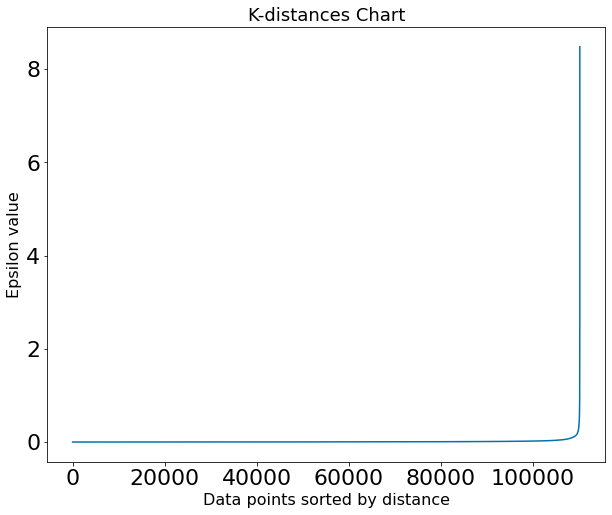

In [88]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize = (10,8))
plt.plot(distances)
plt.title('K-distances Chart', fontsize=18)
plt.xlabel('Data points sorted by distance', fontsize=16)
plt.ylabel('Epsilon value', fontsize=16)
plt.show()

Applying DBSCAN to view the clusters

In [89]:
x_scaled.shape

(110253, 7)

In [90]:
eps_value = 0.3
samples = 7
dbscan = DBSCAN(eps=eps_value, min_samples= samples).fit(x_principal)
labels = dbscan.labels_

df_num['DBSCAN_labels'] = labels
df_num['DBSCAN_labels'].value_counts()

 0     107875
 4       1416
-1        842
 9         11
 1         11
 6         11
 7         11
 8         11
 2          8
 10         8
 11         7
 14         7
 13         7
 12         7
 5          7
 3          7
 15         7
Name: DBSCAN_labels, dtype: int64

In [91]:
labels.max()

15

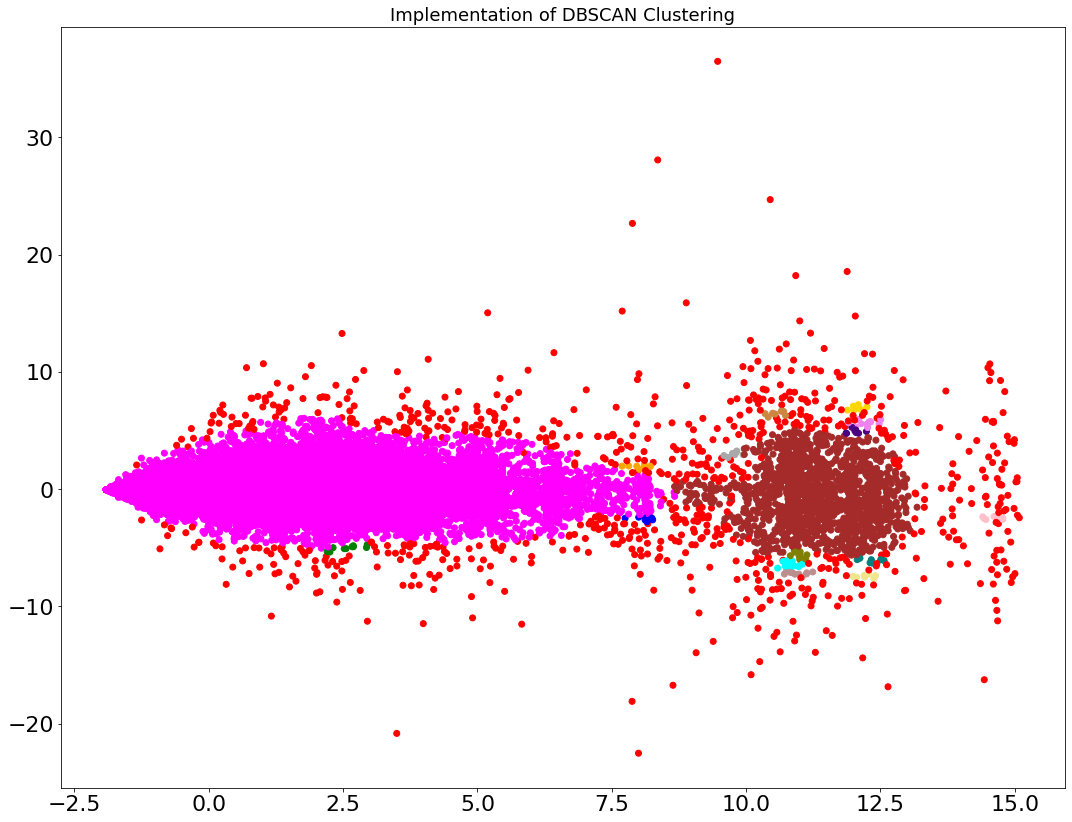

In [92]:
clusterColor = { 0:u'fuchsia', 1:u'green', 2:'blue', 3:'orange', 4:'brown',5:'darkgrey', 6:'rosybrown',7:'olive',8:'aqua',9:'violet',10:'indigo',11:'gold',12:'teal',13:'peru',14:'khaki',15:'pink', -1:'red' }
colors = [clusterColor[label] for label in labels]
plt.figure(figsize=(18,14))
plt.scatter(x_principal['V1'],x_principal['V2'], c=colors)
plt.title("Implementation of DBSCAN Clustering", fontsize=18)
plt.show()

### Optics

In [93]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from matplotlib import gridspec

In [94]:
df_num = df_num.drop('DBSCAN_labels', axis=1)

In [95]:
df_num

,Open,High,Low,Close,Adj Close,Volume,Price Change
0,528.690002,528.690002,528.690002,528.690002,528.690002,0.0,0.000000
1,527.210022,527.210022,527.210022,527.210022,527.210022,0.0,0.000000
2,527.840027,527.840027,527.840027,527.840027,527.840027,0.0,0.000000
3,531.119995,531.119995,531.119995,531.119995,531.119995,0.0,0.000000
4,532.070007,532.070007,532.070007,532.070007,532.070007,0.0,0.000000
...,...,...,...,...,...,...,...
110248,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0,5.949951
110249,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0,7.130005
110250,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0,-7.149902
110251,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0,3.969971


In [96]:
#Normalizing the data
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

scaled_df = NormalizeData(df_num)

pd_scaled_df = pd.DataFrame(scaled_df)

pd_scaled_df.columns = df_num.columns
pd_scaled_df

/Users/subash/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/subash/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,Open,High,Low,Close,Adj Close,Volume,Price Change
0,0.006895,0.006832,0.006921,0.006895,0.006895,0.000000,0.623386
1,0.006873,0.006811,0.006899,0.006873,0.006873,0.000000,0.623386
2,0.006883,0.006820,0.006908,0.006883,0.006883,0.000000,0.623386
3,0.006930,0.006867,0.006956,0.006930,0.006930,0.000000,0.623386
4,0.006944,0.006881,0.006970,0.006944,0.006944,0.000000,0.623386
...,...,...,...,...,...,...,...
110248,0.017262,0.017261,0.017327,0.017349,0.017349,0.004022,0.624163
110249,0.017384,0.017366,0.017443,0.017487,0.017487,0.001703,0.624317
110250,0.017480,0.017362,0.017430,0.017376,0.017376,0.000966,0.622451
110251,0.017458,0.017459,0.017524,0.017516,0.017516,0.001644,0.623904


In [97]:
# The OPTICS Clustering model
minPts = 7
eps_val = 3
optics_model = OPTICS(min_samples=minPts, max_eps=eps_val)

#Training the model
optics_model.fit(pd_scaled_df)

/Users/subash/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_optics.py:903: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


OPTICS(max_eps=3, min_samples=7)

In [98]:
optics_model.labels_

array([-1,  1, -1, ..., -1, -1, -1])

In [99]:
# Producing the labels according to the DBSCAN technique with one eps value.
dbscan_eps1 = 2
labels1 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                core_distances = optics_model.core_distances_,
                                ordering = optics_model.ordering_, eps = dbscan_eps1)

# Producing the labels according to the DBSCAN technique with another eps value.
dbscan_eps2 = 3
labels2 = cluster_optics_dbscan(reachability = optics_model.reachability_,
                                core_distances = optics_model.core_distances_,
                                ordering = optics_model.ordering_, eps = dbscan_eps2)

# Creating a numpy array with numbers at equal spaces till
# the specified range
space = np.arange(len(pd_scaled_df))

# Storing the reachability distance of each point
reachability = optics_model.reachability_[optics_model.ordering_]

# Storing the cluster labels of each point
labels = optics_model.labels_[optics_model.ordering_]

print(labels)

[-1 -1  0 ... -1 -1 -1]


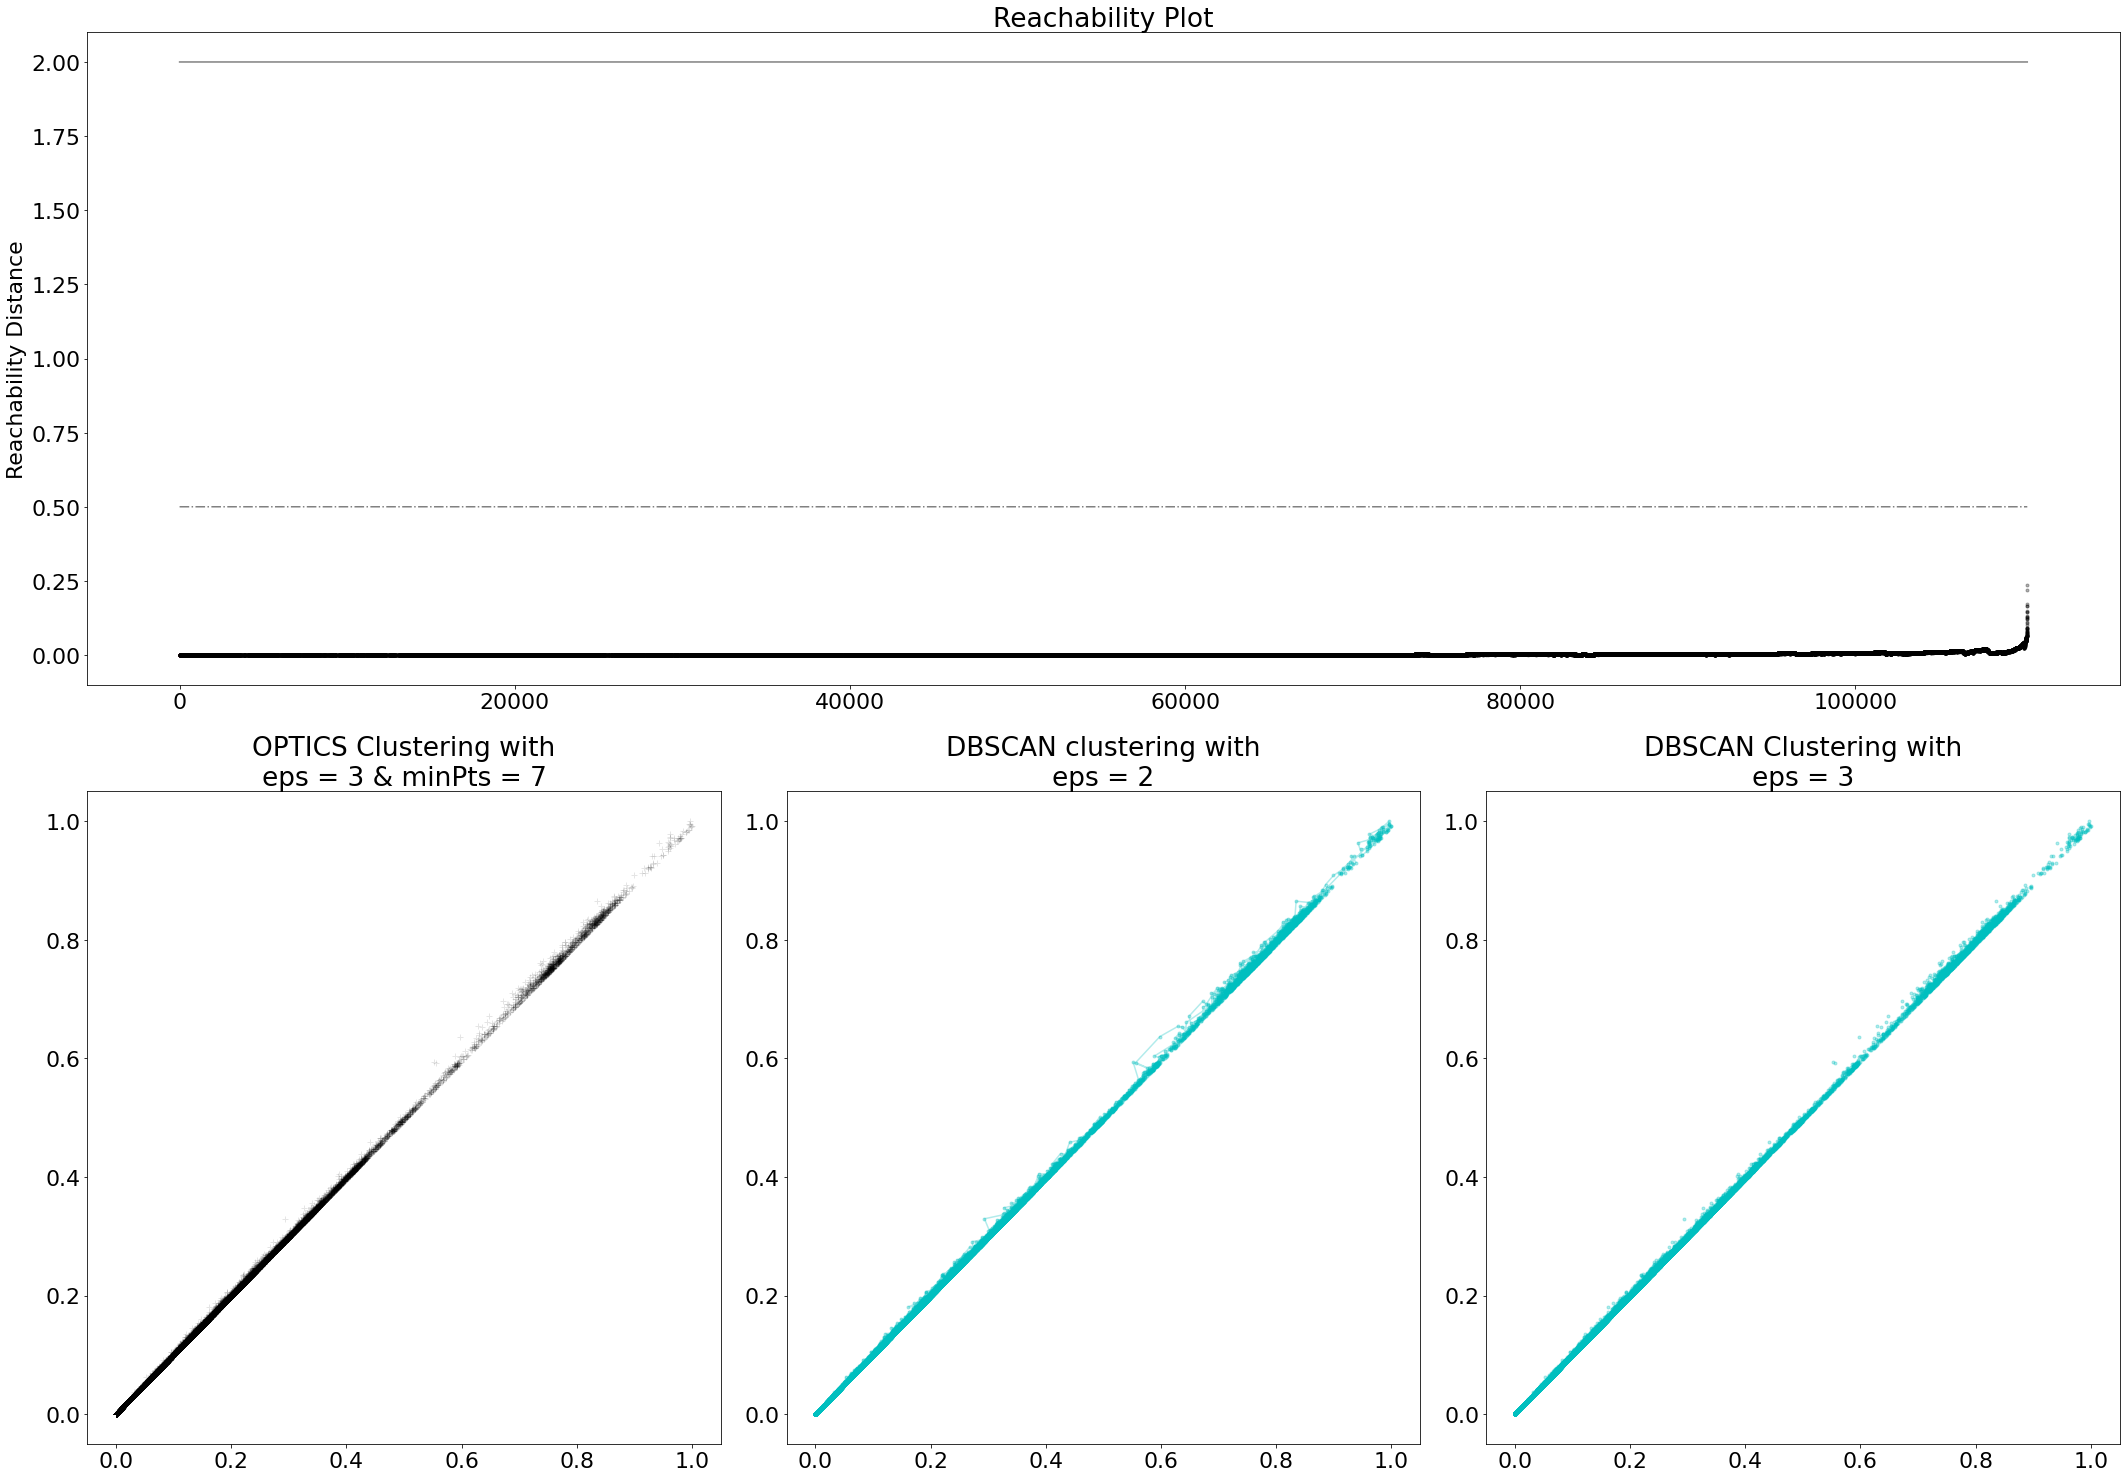

In [100]:
# Defining the framework of the visualization
plt.figure(figsize =(30, 21))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Plotting the Reachability-Distance Plot
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = space[labels == Class]
	Rk = reachability[labels == Class]
	ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')

# Plotting the OPTICS Clustering
colors = ['c.', 'b.', 'r.', 'y.', 'g.']
for Class, colour in zip(range(0, 5), colors):
	Xk = pd_scaled_df[optics_model.labels_ == Class]
	ax2.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
	
ax2.plot(pd_scaled_df.iloc[optics_model.labels_ == -1, 0],
         pd_scaled_df.iloc[optics_model.labels_ == -1, 1],
         'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering with\neps = ' + str(eps_val) + ' & minPts = ' + str(minPts))

# Plotting the DBSCAN Clustering with eps val 1.
colors = ['c', 'b', 'r', 'y', 'g', 'greenyellow']
for Class, colour in zip(range(0, 6), colors):
	Xk = pd_scaled_df[labels1 == Class]
	ax3.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3, marker ='.')
		
ax3.plot(pd_scaled_df.iloc[labels1 == -1, 0],
         pd_scaled_df.iloc[labels1 == -1, 1],
         'k+', alpha = 0.1)
ax3.set_title('DBSCAN clustering with\neps = ' + str(dbscan_eps1))

# Plotting the DBSCAN Clustering with eps val 2.
colors = ['c.', 'y.', 'm.', 'g.']
for Class, colour in zip(range(0, 4), colors):
	Xk = pd_scaled_df.iloc[labels2 == Class]
	ax4.plot(Xk.iloc[:, 0], Xk.iloc[:, 1], colour, alpha = 0.3)
		
ax4.plot(pd_scaled_df.iloc[labels2 == -1, 0],
         pd_scaled_df.iloc[labels2 == -1, 1],
         'k+', alpha = 0.1)
ax4.set_title('DBSCAN Clustering with\neps = ' + str(dbscan_eps2))


plt.tight_layout()